<a href="https://colab.research.google.com/github/abrunagomes/sistemas-de-recomendacao/blob/main/Sistema_de_recomendacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 1 - Problema e ferramenta**



* https://spark.apache.org/docs/latest/api/python/index.html
* https://spark.apache.org/docs/latest/ml-guide.html

## **Dicionário dos dados**

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

* `Acousticness/Acústica:` Variável numérica, medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

* `Danceability/Dançabilidade:` Variável numérica, a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.

* `Duration_ms:`Variável numérica, a duração da trilha em milissegundos.

* `Duration_min:` Variável numérica, a duração da faixa em minutos.

* `Energy/Energia:` Variável numérica, Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

* `Explicit/Explícito:` Variável categórica, se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

* `Id:` O ID do Spotify para a faixa.

* `Instrumentalness/Instrumentalidade:` Variável numérica, prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

* `Key/Chave:`Variável numérica, a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo. 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

* `Liveness/ Ao vivo:` Variável numérica, detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

* `Loudness/ Volume em dB:` Variável numérica, volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

* `Mode/ Modo:` Variável numérica, o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

* `Popularity/Popularidade:` Variável numérica, a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

* `Speechiness/Fala:` Variável numérica, a fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

* `Tempo:` Variável numérica, Tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

* `Valence/Valência:` Variável numérica, Medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada).

* `Year/Ano:` Ano em que a música foi lançada.

<h1>Preparando o ambiente

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=5d5df8943e0094293687293dfa750b76a0175c04f4b816ad66e9b26ff05c892a
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession

In [3]:
sessao_spark = SparkSession.builder\
                           .appName("Recomendador PySpark")\
                           .getOrCreate()
sessao_spark

# **Aula 2 - Leitura e análise dos dados**

Para essa etapa, lemos os dados e fazemos a leitura do csv direto do Github e isso exige que utilizemos o SparkFiles. Depois da leitura, precisamos analisar a integridades dos nossos dados, se existiam dados nulos e também se as colunas estão com os tipos corretos. Verificamos isso através do método printSchema e das sql.functions.

In [4]:
from pyspark import SparkFiles

In [5]:
url_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas.csv?raw=true'
sessao_spark.sparkContext.addFile(url_dados)
path_dados_file = 'file://' + SparkFiles.get('dados_musicas.csv')

In [6]:
dados = sessao_spark.read.csv(path_dados_file, header=True, sep=';', inferSchema=True)

In [7]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [8]:
dados.printSchema()

root
 |-- valence: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- artists: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- energy: double (nullable = true)
 |-- explicit: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- artists_song: string (nullable = true)



In [9]:
dados.count()

20311

In [10]:
len(dados.columns)

19

In [11]:
import pyspark.sql.functions as f

In [12]:
dados.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in dados.columns]).show()

+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|valence|year|acousticness|artists|danceability|duration_ms|energy|explicit| id|instrumentalness|key|liveness|loudness|mode|name|popularity|speechiness|tempo|artists_song|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|      0|   0|           0|      0|           0|          0|     0|       0|  0|               0|  0|       0|       0|   0|   0|         0|          0|    0|           0|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+



In [13]:
print(sorted(dados.select('year').distinct().collect()))

# verificar à quais anos a base de dados está restrita

[Row(year=2000), Row(year=2001), Row(year=2002), Row(year=2003), Row(year=2004), Row(year=2005), Row(year=2006), Row(year=2007), Row(year=2008), Row(year=2009), Row(year=2010), Row(year=2011), Row(year=2012), Row(year=2013), Row(year=2014), Row(year=2015), Row(year=2016), Row(year=2017), Row(year=2018), Row(year=2019), Row(year=2020)]


## **Análise dos dados**

Analisando nossas features descobrimos que é interessante investigar o impacto dos anos de lançamento das músicas em suas características. Para isso, fazemos a leitura de um novo conjunto de dados. Nele, fazemos uma análise com o apoio de uma ferramenta gráfica chamada plotly.

In [14]:
url_anos_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_ano.csv?raw=true'

sessao_spark.sparkContext.addFile(url_anos_dados)
path_dados_file = 'file://' + SparkFiles.get('dados_musicas_ano.csv')

dados_anos = sessao_spark.read.csv(path_dados_file, header=True, inferSchema=True)

In [15]:
dados_anos.show()

+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|mode|year|      acousticness|       danceability|       duration_ms|             energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|            valence|         popularity|key|
+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|   1|1921|0.8868960000000005| 0.4185973333333336|260537.16666666663|0.23181513333333334|0.34487805886666656|            0.20571| -17.04866666666665|           0.073662|101.53149333333329|0.37932666666666665| 0.6533333333333333|  2|
|   1|1922|0.9385915492957748| 0.4820422535211267|165469.74647887325

In [16]:
dados_anos = dados_anos.filter('year >= 2000')

dados_anos.show()

+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|mode|year|       acousticness|      danceability|       duration_ms|            energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|           valence|        popularity|key|
+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|   1|2000|0.28932270051635994| 0.590918047034764| 242724.6426380368|0.6254128323108387|0.10116776879345596| 0.1976860429447853| -8.247765848670758|0.08920541922290394| 118.9993231083843|0.5594754601226991|  46.6840490797546|  7|
|   1|2001| 0.2868424748428934|0.5833178553615969|240307.79600997505|0.626985522

In [17]:
dados_anos.count()

21

In [18]:
len(dados_anos.columns)

14

[Documentação do ToPandas](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.toPandas.html)

ToPandas vai pegar todos os dados e trazer para um nó

A biblioteca Plotly, semelhante às bibliotecas Matplotlib e Seaborn tem como seu propósito a criação de gráficos. Assim como a biblioteca Seaborn, que cria gráficos incríveis sem ser necessário muitas configurações, a Plotly vem com a proposta de trazer gráficos prontos para a apresentação e com o diferencial deles serem interativos, o que é muito útil em exploração e em apresentações.

Para a criação de gráfico podemos utilizar dois principais módulos:

***Plotly Express*** permite criar a figura do gráfico toda de uma vez e é a melhor a opção para fazer gráficos mais comuns, porque vamos conseguir utilizar apenas uma linha de código e um gráfico muito bem formatado.

`import plotly.express as px`

***Graph Objects*** é uma representação mais complexa de uma figura, permitindo criar gráficos diferenciados com animações, por exemplo. Esse módulo é mais complexo de utilizar, já que precisamos de diversos métodos para cada elemento que vamos gerar no gráfico.

`import plotly.graph_objects as go`

Ambos os módulos são muito úteis e devem ser usados em situações específicas. Assim, leia mais a documentação deles e seus exemplos para poder tornar a exploração dos dados musicais mais rica. Compartilhe conosco a visualização que você fez e as hipóteses que conseguiu formular.

In [19]:
import plotly.express as px

fig = px.line(dados_anos.toPandas(), x='year', y='loudness', markers=True, title='Variação do loudness conforme os anos')

fig.show()

In [20]:
import plotly.graph_objects as go

fig = go.Figure()
temp = dados_anos.toPandas()

fig.add_trace(go.Scatter(x=temp['year'], y=temp['acousticness'],
                    name='Acousticness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['speechiness'],
                    name='Speechiness'))

fig.show()

## **Matriz de correlação**

Percebendo que uma feature pode impactar na outra, faremos uma matriz de correlação utilizando os métodos toPandas e corr. Esses métodos, junto com a biblioteca Plotly, geram uma visualização interativa que torna bem mais interessante a análise das correlações entre as características musicais.

In [21]:
fig = px.imshow(dados_anos.drop('mode').toPandas().corr(), text_auto=True)
fig.show()

# **Aula 3 - Clusterização por gênero**

## **PCA e StandartScaler**

O StandardScaler é responsável por padronizar a dimensão nossos dados.

[documentação do StandardSCaler](https://spark.apache.org/docs/latest/ml-features.html#standardscaler)

In [22]:
url_dados_generos = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_genero.csv?raw=true'

sessao_spark.sparkContext.addFile(url_dados_generos)
path_dados_file = "file://" + SparkFiles.get("dados_musicas_genero.csv")

dados_generos = sessao_spark.read.csv(path_dados_file, header=True, inferSchema= True)

In [23]:
dados_generos.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|   1|21st century clas...| 0.9793333333333332|0.16288333333333335|160297.66666666663|0.07131666666666665|          0.60683367|             0.3616|-31.514333333333337| 0.04056666666666667|           75.3365|0.10378333333333334| 27.83333333333333| 

In [24]:
dados_generos.count()

2973

In [25]:
dados_generos.select('genres').distinct().count()

2973

In [26]:
# número de características musicais
len(dados_generos.columns)

14

In [27]:
from pyspark.ml.feature import VectorAssembler

In [28]:
dados_generos.columns

['mode',
 'genres',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [29]:
X = dados_generos.columns

In [30]:
X.remove('genres')

In [31]:
X

['mode',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [32]:
dados_generos_vector = VectorAssembler(inputCols=X, outputCol='features').transform(dados_generos).select(['features', 'genres'])

In [33]:
dados_generos_vector.show(truncate=False, n=5)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|features                                                                                                                                                                                                                   |genres                |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|[1.0,0.9793333333333332,0.16288333333333335,160297.66666666663,0.07131666666666665,0.60683367,0.3616,-31.514333333333337,0.04056666666666667,75.3365,0.10378333333333334,27.83333333333333,6.0]                            |21st century classical|
|[1.0,0.49478,0.2993

In [34]:
from pyspark.ml.feature import StandardScaler

In [35]:
scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
scaler_model = scaler.fit(dados_generos_vector)
dados_generos_scaler = scaler_model.transform(dados_generos_vector)

In [36]:
dados_generos_scaler.show()

+--------------------+--------------------+--------------------+
|            features|              genres|     scaled_features|
+--------------------+--------------------+--------------------+
|[1.0,0.9793333333...|21st century clas...|[2.68174831000279...|
|[1.0,0.49478,0.29...|               432hz|[2.68174831000279...|
|[1.0,0.762,0.7120...|               8-bit|[2.68174831000279...|
|[1.0,0.6514170195...|                  []|[2.68174831000279...|
|[1.0,0.6765573049...|          a cappella|[2.68174831000279...|
|[1.0,0.45921,0.51...|            abstract|[2.68174831000279...|
|[1.0,0.3421466666...|      abstract beats|[2.68174831000279...|
|[1.0,0.2438540633...|    abstract hip hop|[2.68174831000279...|
|[0.0,0.3229999999...|           accordeon|[0.0,1.0101313736...|
|[1.0,0.446125,0.6...|           accordion|[2.68174831000279...|
|[0.0,0.0679505384...|          acid house|[0.0,0.2125045534...|
|[1.0,0.2569145079...|           acid rock|[2.68174831000279...|
|[1.0,0.00683,0.66...|   

## **PCA**

PCA é um método clássico que podemos usar para reduzir dados de alta dimensionalidade para um espaço de baixa dimensão. Em outras palavras, não podemos visualizar com precisão conjuntos de dados de alta dimensão porque não é possível observar nada acima de 3 dimensões (3D). Um dos principais objetivos do PCA é transformar conjuntos de dados com mais de 3 dimensões (alta dimensão) em gráficos tipicamente 2D ou 3D para nós e isso é o que chamamos de espaço de baixa dimensão.

Mesmo fazendo toda a redução de n dimensões existentes para 2D, no nosso caso, ainda conseguimos reter uma parte da variação de informação do conjunto de dados de alta dimensão. Então, as variações dos dados que eram contidas em n dimensões passam a estar em 2 componentes principais (PC). O primeiro PC contém a maioria das informações de variação dos recursos originais, o segundo conterá a próxima maior quantidade de informações, e caso tivéssemos mais PC 's, seria essa mesma sequência com os PC’s não correlacionados entre si, o que significa que cada um guarda informações únicas.

In [37]:
from pyspark.ml.feature import PCA

In [38]:
pca = PCA(k=2, inputCol='scaled_features', outputCol='pca_features')
pca_model = pca.fit(dados_generos_scaler)
dados_generos_pca = pca_model.transform(dados_generos_scaler)

In [39]:
dados_generos_pca.select('pca_features').show(truncate=False)

+------------------------------------------+
|pca_features                              |
+------------------------------------------+
|[2.507095366888567,0.43816913737697955]   |
|[-0.5969679056633486,4.981612052751347]   |
|[-4.158460276223561,-0.8366525081079937]  |
|[-2.387344878512217,-0.4877989015663406]  |
|[-2.6501218371679083,-0.5756819768820469] |
|[-1.4965091203367624,1.8644183183717793]  |
|[-3.9235207721573238,0.2851835002352834]  |
|[-4.611011109831115,-0.6783790472312372]  |
|[-2.8376900630842297,-0.5712993716580518] |
|[-2.706690139892783,-1.2593788079708297]  |
|[-4.698331383924287,1.276556968061945]    |
|[-3.3759874966798677,0.756074106430747]   |
|[-5.608998877066021,1.0427311644393216]   |
|[0.29549463521176883,-0.27638645862363015]|
|[-2.5725591062870423,-1.3169815431109795] |
|[-3.400822802049345,0.5073029625781902]   |
|[-4.366720316263418,-0.33648270597710866] |
|[-2.7254698167724003,0.5058604987046368]  |
|[-4.958112358381606,1.2627579957290729]   |
|[-3.69349

In [40]:
from pyspark.ml import Pipeline

In [41]:
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=X, outputCol='features'),
                                StandardScaler(inputCol='features', outputCol='scaled_features'),
                                PCA(k=2, inputCol='scaled_features', outputCol='pca_features')])

In [42]:
pca_pipeline_model = pca_pipeline.fit(dados_generos)

In [43]:
dados_generos_pca = pca_pipeline_model.transform(dados_generos)

In [44]:
dados_generos_pca.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|            features|     scaled_features|        pca_features|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|   1|21st century clas...| 0.9793333333333332|0.162883333

In [45]:
dados_generos_pca.select('pca_features').show(truncate=False)

+------------------------------------------+
|pca_features                              |
+------------------------------------------+
|[2.507095366888567,0.43816913737697955]   |
|[-0.5969679056633486,4.981612052751347]   |
|[-4.158460276223561,-0.8366525081079937]  |
|[-2.387344878512217,-0.4877989015663406]  |
|[-2.6501218371679083,-0.5756819768820469] |
|[-1.4965091203367624,1.8644183183717793]  |
|[-3.9235207721573238,0.2851835002352834]  |
|[-4.611011109831115,-0.6783790472312372]  |
|[-2.8376900630842297,-0.5712993716580518] |
|[-2.706690139892783,-1.2593788079708297]  |
|[-4.698331383924287,1.276556968061945]    |
|[-3.3759874966798677,0.756074106430747]   |
|[-5.608998877066021,1.0427311644393216]   |
|[0.29549463521176883,-0.27638645862363015]|
|[-2.5725591062870423,-1.3169815431109795] |
|[-3.400822802049345,0.5073029625781902]   |
|[-4.366720316263418,-0.33648270597710866] |
|[-2.7254698167724003,0.5058604987046368]  |
|[-4.958112358381606,1.2627579957290729]   |
|[-3.69349

## **K-Means**

 o K-means tenta organizar os dados em um número k de clusters que definimos inicialmente. A partir disso, ele identifica os pontos de dados semelhantes e vai criando agrupamentos, tentando distanciar cada cluster o máximo possível.

 O processo de como o K-means funciona é relativamente simples e repetitivo.

- O usuário define o valor de clusters (k).

- O K-means selecionará um ponto aleatório para cada centróide. Temos k-centróides nesse ponto e um centróide é o ponto em torno do qual cada cluster é construído.

- A distância euclidiana é calculada entre cada ponto de cada centróide. A partir disso, cada ponto será atribuído a um centróide (mais próximo com base na distância euclidiana).

- O algoritmo, então, calcula a média da distância euclidiana, entre cada ponto do cluster e o centróide, para definir um novo centróide.

- O processo 4 se repete até que os centróides dos clusters não se movam mais.

https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/

In [46]:
from pyspark.ml.clustering import KMeans

In [47]:
SEED = 1224

In [48]:
kmeans = KMeans(featuresCol='pca_features', predictionCol='cluster_pca').setK(5).setSeed(SEED)

In [49]:
model_kmeans = kmeans.fit(dados_generos_pca)

In [50]:
predictions_kmeans = model_kmeans.transform(dados_generos_pca)

In [51]:
predictions_kmeans.select('pca_features', 'cluster_pca').show(truncate=False)

+------------------------------------------+-----------+
|pca_features                              |cluster_pca|
+------------------------------------------+-----------+
|[2.507095366888567,0.43816913737697955]   |2          |
|[-0.5969679056633486,4.981612052751347]   |2          |
|[-4.158460276223561,-0.8366525081079937]  |4          |
|[-2.387344878512217,-0.4877989015663406]  |0          |
|[-2.6501218371679083,-0.5756819768820469] |0          |
|[-1.4965091203367624,1.8644183183717793]  |2          |
|[-3.9235207721573238,0.2851835002352834]  |4          |
|[-4.611011109831115,-0.6783790472312372]  |1          |
|[-2.8376900630842297,-0.5712993716580518] |4          |
|[-2.706690139892783,-1.2593788079708297]  |0          |
|[-4.698331383924287,1.276556968061945]    |3          |
|[-3.3759874966798677,0.756074106430747]   |4          |
|[-5.608998877066021,1.0427311644393216]   |1          |
|[0.29549463521176883,-0.27638645862363015]|2          |
|[-2.5725591062870423,-1.316981

## **Plotando a clustering**

In [52]:
from pyspark.ml.functions import vector_to_array

In [53]:
pca_features_xy = predictions_kmeans.withColumn('x', vector_to_array('pca_features')[0])\
                .withColumn('y', vector_to_array('pca_features')[1])\
                .select(['x', 'y', 'cluster_pca', 'genres'])

In [54]:
pca_features_xy.show()

+-------------------+--------------------+-----------+--------------------+
|                  x|                   y|cluster_pca|              genres|
+-------------------+--------------------+-----------+--------------------+
|  2.507095366888567| 0.43816913737697955|          2|21st century clas...|
|-0.5969679056633486|   4.981612052751347|          2|               432hz|
| -4.158460276223561| -0.8366525081079937|          4|               8-bit|
| -2.387344878512217| -0.4877989015663406|          0|                  []|
|-2.6501218371679083| -0.5756819768820469|          0|          a cappella|
|-1.4965091203367624|  1.8644183183717793|          2|            abstract|
|-3.9235207721573238|  0.2851835002352834|          4|      abstract beats|
| -4.611011109831115| -0.6783790472312372|          1|    abstract hip hop|
|-2.8376900630842297| -0.5712993716580518|          4|           accordeon|
| -2.706690139892783| -1.2593788079708297|          0|           accordion|
| -4.6983313

In [55]:
fig = px.scatter(pca_features_xy.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'genres'])
fig.show()

In [56]:
pca_pipeline_model.stages[2].explainedVariance

DenseVector([0.2975, 0.1212])

# **Aula 4 - Clusterização por música**

## **Redução de dimensionalidade com PCA**

é preciso vetorizar os dados utilizando o VectorAssembler e padronizá-los com o StandardScaler. Essas etapas são importantes porque o Spark precisa dos dados como vetores e que o PCA é sensível à escala.

In [57]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [58]:
X = dados.columns
X.remove('artists')
X.remove('id')
X.remove('name')
X.remove('artists_song')
X

['valence',
 'year',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo']

In [59]:
dados_encoded_vector = VectorAssembler(inputCols=X, outputCol='features').transform(dados)

In [60]:
dados_encoded_vector.select('features').show(truncate=False, n=5)

+-------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                 |
+-------------------------------------------------------------------------------------------------------------------------+
|[0.285,2000.0,0.00239,0.429,266773.0,0.6609999999999999,0.0,1.21E-4,11.0,0.234,-7.227,1.0,84.0,0.0281,173.372]           |
|[0.613,2000.0,0.143,0.843,270507.0,0.8059999999999999,1.0,0.0,4.0,0.0771,-5.9460000000000015,0.0,80.0,0.269,94.948]      |
|[0.4,2000.0,0.00958,0.556,216880.0,0.8640000000000001,0.0,0.0,3.0,0.209,-5.87,0.0,84.0,0.0584,105.143]                   |
|[0.5429999999999999,2000.0,0.00664,0.545,233933.0,0.865,0.0,1.1E-5,11.0,0.168,-5.7079999999999975,0.0,78.0,0.0286,99.009]|
|[0.76,2000.0,0.0302,0.949,284200.0,0.6609999999999999,1.0,0.0,5.0,0.0454,-4.244,0.0,80.0,0.0572,104.504]                 |
+-------

In [61]:
scaler = StandardScaler(inputCol='features', outputCol='features_scaled')
model_scaler = scaler.fit(dados_encoded_vector)
dados_musicas_scaler = model_scaler.transform(dados_encoded_vector)

In [62]:
dados_musicas_scaler.select('features_scaled').show(truncate=False, n=5)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_scaled                                                                                                                                                                                                                                                               |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[1.156596679221045,329.8170613984441,0.008403188822334736,2.5040545743834373,3.7858811737298526,2.980511298201045,0.0,6.070790766862789E-4,3.0696424994844875,1.4832857988766257,-1.

In [63]:
k = len(X)
k

15

In [64]:
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)
dados_musicas_pca = model_pca.transform(dados_musicas_scaler)

Com o objetivo de minimizar o número de componentes, mas ainda assim conseguir representar bem nossos dados, precisamos fazer um estudo no número de componentes ideais para o PCA. Para fazer isso, utilizamos o explainedVariance que calcula o valor de k.

In [65]:
sum(model_pca.explainedVariance) * 100

99.99999999999999

In [66]:
lista_valores = [sum(model_pca.explainedVariance[0:i+1]) for i in range(k)]
lista_valores

[0.21297354127107343,
 0.34597741622955064,
 0.43989805678254446,
 0.5267820578269102,
 0.6001038103117928,
 0.6665719513652388,
 0.7282174213581727,
 0.7845103843321022,
 0.8350002357002613,
 0.8812446547406768,
 0.9151737562703046,
 0.9435370133056037,
 0.9699018569070159,
 0.9900947792885578,
 0.9999999999999999]

In [67]:
import numpy as np

In [68]:
k = sum(np.array(lista_valores) <= 0.7)
k

6

In [69]:
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)
dados_musicas_pca_final = model_pca.transform(dados_musicas_scaler)

In [70]:
dados_musicas_pca_final.select('pca_features').show(truncate=False, n=5)

+-----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                           |
+-----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775704,-165.36848784906184,-11.163498729833321,-139.11374280854437,-14.152192300931375,6.254422223810391] |
|[-36.498857627749054,-167.85185045616558,-10.729023248907561,-135.90435265671297,-13.388401890587229,3.972980727830862]|
|[-35.460300916940554,-165.99633344577887,-11.361290348241594,-138.24276881247,-13.866654919305782,4.342675920458719]   |
|[-35.56301325520583,-165.59515096480607,-11.46022600703138,-137.52095740570041,-15.56854280392272,4.542073725584272]   |
|[-36.54556974907567,-167.37512505802482,-11.881276527236556,-136.2779859024398,-14.056847990344538,3.5833901457791564] |
+-----------------------

In [71]:
sum(model_pca.explainedVariance) * 100


66.65719513652388

O método explainedVariance nos fornece uma lista com os percentuais de explicação de cada componente e a soma dos elementos dessa lista é o quanto está sendo explicado da variação do conjunto de dados. Por exemplo, ao somar a lista retornada no enunciado da questão, obtemos 0.5268 (ou 52.68%). Se fosse necessário uma explicação maior, teríamos que adicionar mais componentes.

## **Aplicação do cluster com K-Means**

 utilizamos o KMeans para criar clusters musicais. Com o valor de 50 clusters e depois de observarmos esse resultado com o Plotly, é importante lembrar que nossa visualização será prejudicada, já que o KMeans utiliza todas as componentes em seu ajuste e nosso gráfico representa apenas duas delas.

In [72]:
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=X, outputCol='features'),
                                StandardScaler(inputCol='features', outputCol='features_scaled'),
                                PCA(k=6, inputCol='features_scaled', outputCol='pca_features')])

In [73]:
model_pca_pipeline = pca_pipeline.fit(dados)

In [74]:
projection = model_pca_pipeline.transform(dados)

In [75]:
projection.select('pca_features').show(truncate=False, n=5)

+-----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                           |
+-----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775704,-165.36848784906184,-11.163498729833321,-139.11374280854437,-14.152192300931375,6.254422223810391] |
|[-36.498857627749054,-167.85185045616558,-10.729023248907561,-135.90435265671297,-13.388401890587229,3.972980727830862]|
|[-35.460300916940554,-165.99633344577887,-11.361290348241594,-138.24276881247,-13.866654919305782,4.342675920458719]   |
|[-35.56301325520583,-165.59515096480607,-11.46022600703138,-137.52095740570041,-15.56854280392272,4.542073725584272]   |
|[-36.54556974907567,-167.37512505802482,-11.881276527236556,-136.2779859024398,-14.056847990344538,3.5833901457791564] |
+-----------------------

In [76]:
kmeans = KMeans(k=50, featuresCol='pca_features', predictionCol='cluster_pca', seed=SEED)

In [77]:
modelo_kmeans = kmeans.fit(projection)

In [78]:
projection_kmeans = modelo_kmeans.transform(projection)

In [79]:
projection_kmeans.select(['pca_features', 'cluster_pca']).show()

+--------------------+-----------+
|        pca_features|cluster_pca|
+--------------------+-----------+
|[-34.710044647757...|          8|
|[-36.498857627749...|          4|
|[-35.460300916940...|         35|
|[-35.563013255205...|         16|
|[-36.545569749075...|         34|
|[-36.713222290262...|         34|
|[-36.013246178822...|         34|
|[-36.542687712104...|         23|
|[-36.425249009784...|         16|
|[-35.872074915770...|         34|
|[-31.639065936568...|         44|
|[-35.661446890546...|         34|
|[-35.574542234850...|         32|
|[-36.022399748656...|         13|
|[-34.336941950985...|         35|
|[-35.096906055142...|         49|
|[-35.202423054032...|         38|
|[-34.942948671026...|         30|
|[-36.617404517517...|          4|
|[-34.296973387410...|          6|
+--------------------+-----------+
only showing top 20 rows



In [80]:
projection_kmeans = projection_kmeans.withColumn('x', vector_to_array('pca_features')[0])\
                                     .withColumn('y', vector_to_array('pca_features')[1])

In [81]:
projection_kmeans.select(['x', 'y', 'cluster_pca', 'artists_song']).show(truncate=False)

+-------------------+-------------------+-----------+--------------------------------------------------------+
|x                  |y                  |cluster_pca|artists_song                                            |
+-------------------+-------------------+-----------+--------------------------------------------------------+
|-34.71004464775704 |-165.36848784906184|8          |Coldplay - Yellow                                       |
|-36.498857627749054|-167.85185045616558|4          |OutKast - Ms. Jackson                                   |
|-35.460300916940554|-165.99633344577887|35         |Linkin Park - In the End                                |
|-35.56301325520583 |-165.59515096480607|16         |3 Doors Down - Kryptonite                               |
|-36.54556974907567 |-167.37512505802482|34         |Eminem - The Real Slim Shady                            |
|-36.71322229026232 |-166.48208483099708|34         |Disturbed - Down with the Sickness                      |
|

## **Analisando o cluster**

In [82]:
fig = px.scatter(projection_kmeans.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['artists_song'])

In [83]:
fig.show()

# **Aula 5 - Sistemas de Recomendação**

## **Distâncias das musicas**

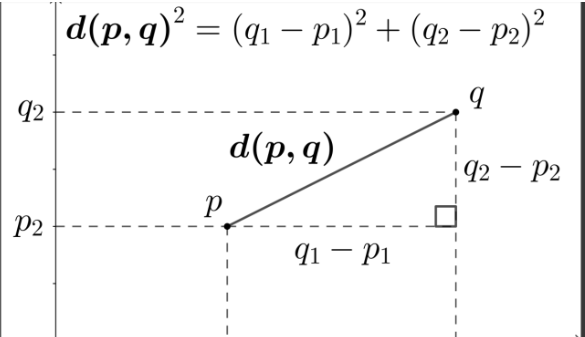

In [84]:
nome_musica = 'Taylor Swift - Blank Space'

In [85]:
# descobrir a qual cluster a musica escolhida pertence
cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
cluster

3

In [86]:
# descobrir quais outras músicas também pertencem a esse cluster
musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster).select('artists_song', 'id', 'pca_features')
musicas_recomendadas.show()

+--------------------+--------------------+--------------------+
|        artists_song|                  id|        pca_features|
+--------------------+--------------------+--------------------+
|Usher - Yeah! (fe...|5rb9QrpfcKFHM1EUb...|[-36.050436933493...|
|Kelly Clarkson - ...|3xrn9i8zhNZsTtcoW...|[-35.191226411336...|
| Keyshia Cole - Love|0W4NhJhcqKCqEP2GI...|[-34.751332435196...|
|Mariah Carey - We...|3LmvfNUQtglbTryds...|[-35.144610288312...|
|Korn - Coming Undone|6p2liQLGoDaLXgND6...|[-35.272207170621...|
|Chris Brown - Yo ...|7DFnq8FYhHMCylykf...|[-35.112344117719...|
|  Aventura - Un Beso|1SaEt8dwTuLDzenUu...|[-34.134357732463...|
|Chris Brown - Say...|5F7IJrXD6Fa3EmqoY...|[-34.728839526520...|
|Red Hot Chili Pep...|10Nmj3JCNoMeBQ87u...|[-36.101793760083...|
|Craig Morgan - In...|0Ta3jOf8m9yCSWMVw...|[-35.227552248025...|
|Arctic Monkeys - ...|3geFzA6VBSNZUTmV3...|[-34.696049351615...|
|Arctic Monkeys - 505|58ge6dfP91o9oXMzq...|[-35.057671072817...|
|T-Pain - Buy U a ...|2aI

In [87]:
# qual a distância da música selecionada para todas as outras recomendadas
componentes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica).select('pca_features').collect()[0][0]

In [88]:
componentes_musica

DenseVector([-35.461, -166.9658, -12.7925, -137.9457, -13.1234, 4.1374])

## **Recomendação da música**

In [89]:
from scipy.spatial.distance import euclidean
from pyspark.sql.types import FloatType

In [90]:
def calcula_distance(value):
  return euclidean(componentes_musica, value)

udf_calcula_distance = f.udf(calcula_distance, FloatType())

musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

# ordenando o dataframe

recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])
recomendadas.show(truncate=False)

+-----------------------------------------+----------------------+-------------------+
|artists_song                             |id                    |Dist               |
+-----------------------------------------+----------------------+-------------------+
|Taylor Swift - Blank Space               |1p80LdxRV74UKvL8gnD7ky|0.0                |
|Imagine Dragons - Machine                |4uGY9CqDtGtaTTLg1cgsWD|0.37921473383903503|
|The All-American Rejects - Gives You Hell|6ihL9TjfRjadfEePzXXyVF|0.6039153933525085 |
|Darius Rucker - Beers And Sunshine       |36ISlLb12gKuCCVTYXC0gb|0.6824935674667358 |
|Old Dominion - Snapback                  |7I5fYc4qKJddht8Ozhqqdx|0.7364036440849304 |
|Dan + Shay - Nothin' Like You            |4W38RXuQNuoTSwVsQA1OGC|0.7841535210609436 |
|Twenty One Pilots - Not Today            |7qxjGHW485TL8ciwkHD5MK|0.8002141118049622 |
|Jon Bellion - Morning In America         |2JXNOtb0ANe6MzgRYDQG2J|0.8098159432411194 |
|Kip Moore - More Girls Like You          |

In [91]:
def recomendador(nome_musica):
  cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
  musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
  componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

  def calcula_distance(value):
    return euclidean(componenetes_musica, value)

  udf_calcula_distance = f.udf(calcula_distance, FloatType())

  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

  recomendadas.select('artists_song').show(truncate=False)

In [92]:
recomendador('Taylor Swift - Blank Space')

+-----------------------------------------+
|artists_song                             |
+-----------------------------------------+
|Taylor Swift - Blank Space               |
|Imagine Dragons - Machine                |
|The All-American Rejects - Gives You Hell|
|Darius Rucker - Beers And Sunshine       |
|Old Dominion - Snapback                  |
|Dan + Shay - Nothin' Like You            |
|Twenty One Pilots - Not Today            |
|Jon Bellion - Morning In America         |
|Kip Moore - More Girls Like You          |
|Calibre 50 - Corrido De Juanito          |
+-----------------------------------------+



## **Biblioteca Spotipy**

[documentação do spotify](https://developer.spotify.com/documentation/web-api/reference/get-track)

In [93]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.1/241.1 kB 7.8 MB/s eta 0:00:00


In [94]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

**ATENÇÃO!**

Antes de rodar essa parte do código, você precisa fazer uma conta na API do Spotify e gerar suas próprias **client_id** e **client_secret**

In [95]:
scope = "user-library-read playlist-modify-private"

OAuth = SpotifyOAuth(
        scope=scope,
        redirect_uri='http://localhost:5000/callback',
        client_id = '9452d176acf046e7b2a0b2d9d0d01271',
        client_secret = 'ef9f080136ff4afeb166b18b6b717535')

In [96]:
client_credentials_manager = SpotifyClientCredentials(client_id = '9452d176acf046e7b2a0b2d9d0d01271',
                                                      client_secret = 'ef9f080136ff4afeb166b18b6b717535')

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [99]:
id = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('id').collect()[0][0]
id

'1p80LdxRV74UKvL8gnD7ky'

In [100]:
sp.track(id)

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
    'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
    'id': '06HL4z0CvFAxyc27GXpf02',
    'name': 'Taylor Swift',
    'type': 'artist',
    'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
  'available_markets': ['CA', 'US'],
  'external_urls': {'spotify': 'https://open.spotify.com/album/2QJmrSgbdM35R67eoGQo4j'},
  'href': 'https://api.spotify.com/v1/albums/2QJmrSgbdM35R67eoGQo4j',
  'id': '2QJmrSgbdM35R67eoGQo4j',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b2739abdf14e6058bd3903686148',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e029abdf14e6058bd3903686148',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d000048519abdf14e6058bd3903686148',
    'width': 64}],
  'name': '1989',
  'release_date': '2014-10-27',
  'release

In [106]:
def recomendador(nome_musica):

  # Calcula musicas recomendadas

  cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
  musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
  componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

  def calcula_distance(value):
    return euclidean(componenetes_musica, value)

  udf_calcula_distance = f.udf(calcula_distance, FloatType())

  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

  recomendadas.select('artists_song').show(truncate=False)

  #Pegar informações da API

  playlist_id = recomendadas.select('id').collect()

  playlist_track = []

  for id in playlist_id:
    playlist_track.append(sp.track(id[0]))

  return len(playlist_track)

In [107]:
recomendador('Taylor Swift - Blank Space')

+-----------------------------------------+
|artists_song                             |
+-----------------------------------------+
|Taylor Swift - Blank Space               |
|Imagine Dragons - Machine                |
|The All-American Rejects - Gives You Hell|
|Darius Rucker - Beers And Sunshine       |
|Old Dominion - Snapback                  |
|Dan + Shay - Nothin' Like You            |
|Twenty One Pilots - Not Today            |
|Jon Bellion - Morning In America         |
|Kip Moore - More Girls Like You          |
|Calibre 50 - Corrido De Juanito          |
+-----------------------------------------+



10

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-track

## **Imagem do álbum**

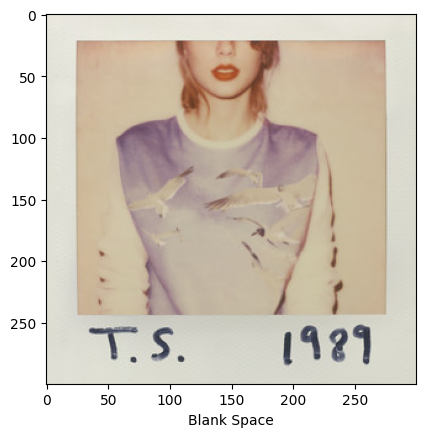

In [109]:
import matplotlib.pyplot as plt
from skimage import io

nome_musica = 'Taylor Swift - Blank Space'

id = projection_kmeans\
          .filter(projection_kmeans.artists_song == nome_musica)\
          .select('id').collect()[0][0]

track = sp.track(id)

url = track["album"]["images"][1]["url"]
name = track["name"]

image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 10)
plt.show()

In [110]:
import matplotlib.pyplot as plt
from skimage import io

def visualize_songs(name,url):

    plt.figure(figsize=(15,10))
    columns = 5
    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 10)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.grid(visible=None)
        #plt.axis('off')
    plt.show()

In [112]:
playlist_id = recomendadas.select('id').collect()

name = []
url = []
for i in playlist_id:
    track = sp.track(i[0])
    url.append(track["album"]["images"][1]["url"])
    name.append(track["name"])

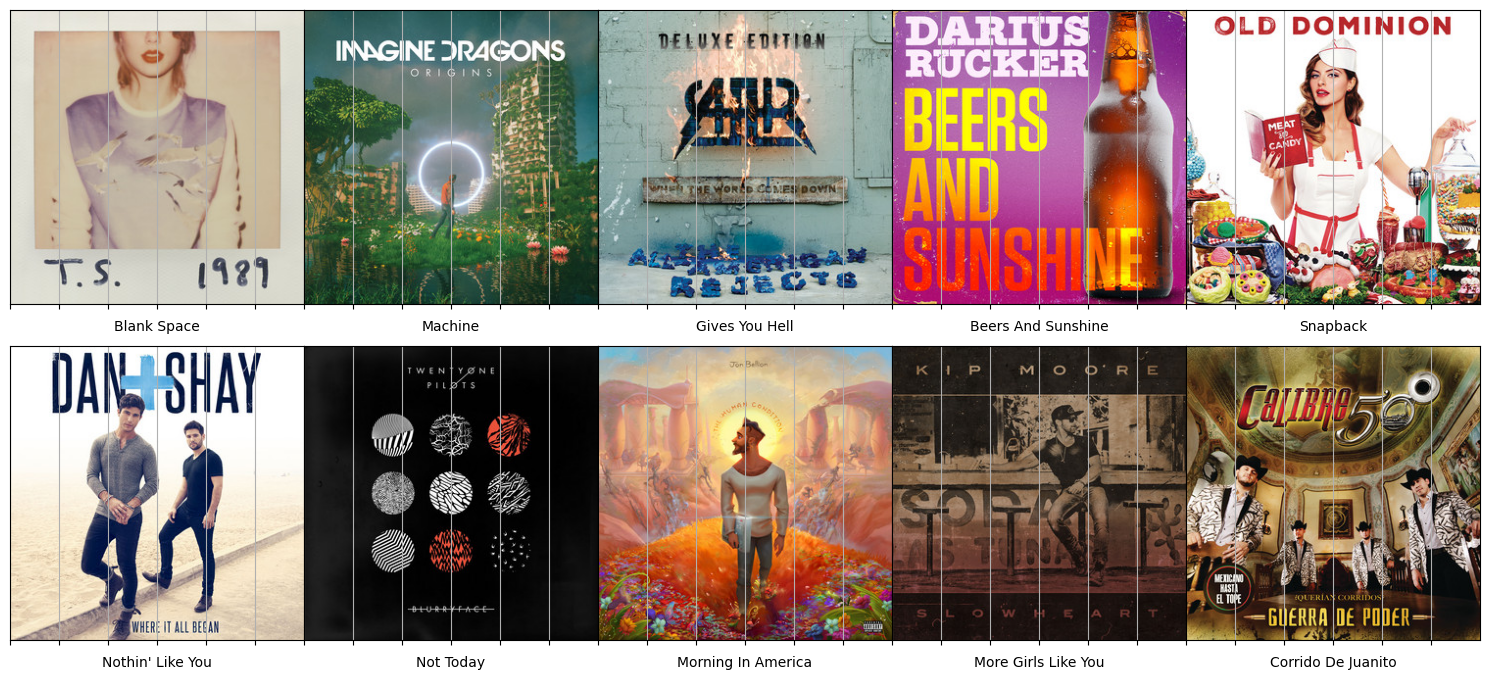

In [113]:
visualize_songs(name,url)

In [114]:
def recomendador(nome_musica):
  # Calcula musicas recomendadas
  cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
  musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
  componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

  def calcula_distance(value):
    return euclidean(componenetes_musica, value)

  udf_calcula_distance = f.udf(calcula_distance, FloatType())

  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

  #Pegar informações da API

  playlist_id = recomendadas.select('id').collect()

  name = []
  url = []
  for i in playlist_id:
      track = sp.track(i[0])
      url.append(track["album"]["images"][1]["url"])
      name.append(track["name"])

  #Plotando capas

  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
      ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
      image = io.imread(u)
      plt.imshow(image)
      ax.get_yaxis().set_visible(False)
      plt.xticks(color = 'w', fontsize = 0.1)
      plt.yticks(color = 'w', fontsize = 0.1)
      plt.xlabel(name[i], fontsize = 10)
      plt.tight_layout(h_pad=0.7, w_pad=0)
      plt.subplots_adjust(wspace=None, hspace=None)
      plt.grid(visible=None)
      #plt.axis('off')
  plt.show()

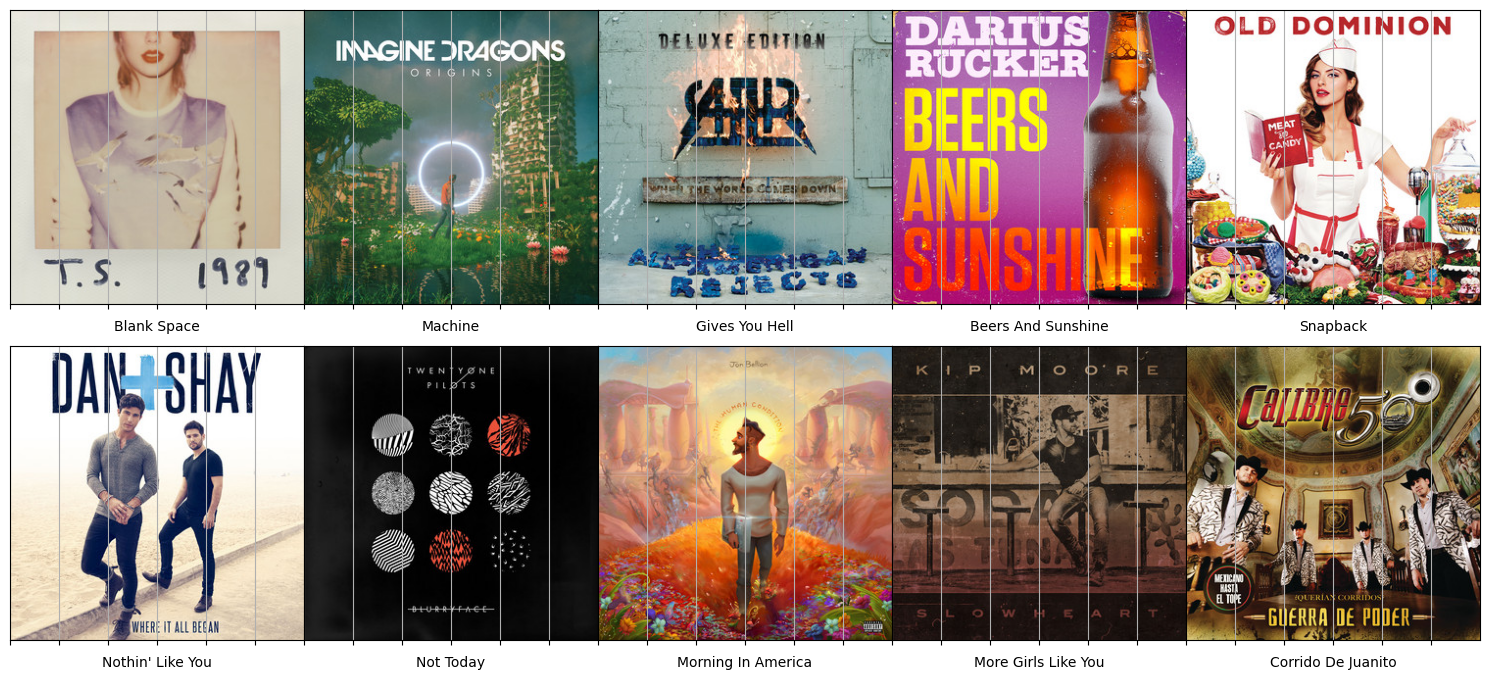

In [117]:
recomendador('Taylor Swift - Blank Space')